In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('dataset/diabetes.csv')

diabetes_negative = df[df.Diabetes_binary == 0]
diabetes_positive = df[df.Diabetes_binary == 1]

class_0_downsampled = diabetes_negative.sample(len(diabetes_positive), random_state=42)

balanced_df = pd.concat([class_0_downsampled, diabetes_positive], axis=0)

X = balanced_df.drop("Diabetes_binary", axis=1)
y = balanced_df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
                 
balanced_df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5185,0.0,0,0.0,1,29.0,0.0,0.0,0.0,1,0,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,11.0
200939,0.0,0,0.0,1,28.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,2.0,1.0,0.0,1,4,6.0,8.0
128506,0.0,0,0.0,1,27.0,1.0,0.0,0.0,1,1,1,1,1,0.0,3.0,6.0,0.0,0.0,0,8,6.0,9.0
371,0.0,0,1.0,0,21.0,0.0,0.0,0.0,0,0,0,0,1,0.0,4.0,0.0,30.0,1.0,0,12,6.0,6.0
7178,0.0,1,0.0,1,45.0,1.0,0.0,1.0,0,1,0,0,1,1.0,4.0,0.0,1.0,0.0,1,9,5.0,6.0


In [10]:
from gan import CTGAN

real_data = balanced_df

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, columns)
ctgan.save('ctgan.keras')

In [16]:
gan_model = ctgan.load('ctgan.keras')
synthetic_data = gan_model.sample(10000)
synthetic_data.head(100)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1,1.0,0,17.0,1.0,1.0,0.0,1,0,1,0,1,0.0,3.0,14.0,15.0,0.0,0,11,6.0,7.0
1,1.0,1,1.0,1,22.0,0.0,0.0,0.0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,0,8,5.0,5.0
2,0.0,0,0.0,1,23.0,1.0,0.0,0.0,1,0,1,0,0,0.0,3.0,0.0,0.0,1.0,1,7,4.0,10.0
3,1.0,1,1.0,1,35.0,0.0,0.0,1.0,1,1,1,0,1,0.0,3.0,0.0,2.0,0.0,1,12,6.0,2.0
4,0.0,0,0.0,1,32.0,1.0,0.0,0.0,1,1,1,0,1,0.0,3.0,5.0,0.0,0.0,1,8,6.0,11.0
5,0.0,0,0.0,1,26.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,13,6.0,1.0
6,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,0,0,1,0.0,2.0,0.0,0.0,0.0,1,11,6.0,7.0
7,0.0,0,0.0,1,25.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,8,6.0,6.0
8,0.0,1,0.0,1,44.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,1,13,6.0,7.0
9,1.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,0,0,1,0.0,3.0,30.0,7.0,0.0,1,6,5.0,7.0


c:\Users\ensar\Desktop\Diabetes-Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  Accuracy on real data: 0.7354781054512958
  Accuracy on synthetic data: 0.7221
Naive Bayes:
  Accuracy on real data: 0.7138814417634793
  Accuracy on synthetic data: 0.7381
Random Forest:
  Accuracy on real data: 0.7264670837056896
  Accuracy on synthetic data: 0.7067
K-Nearest Neighbors:
  Accuracy on real data: 0.6854334226988382
  Accuracy on synthetic data: 0.6525
Decision Tree:
  Accuracy on real data: 0.6436550491510277
  Accuracy on synthetic data: 0.6166


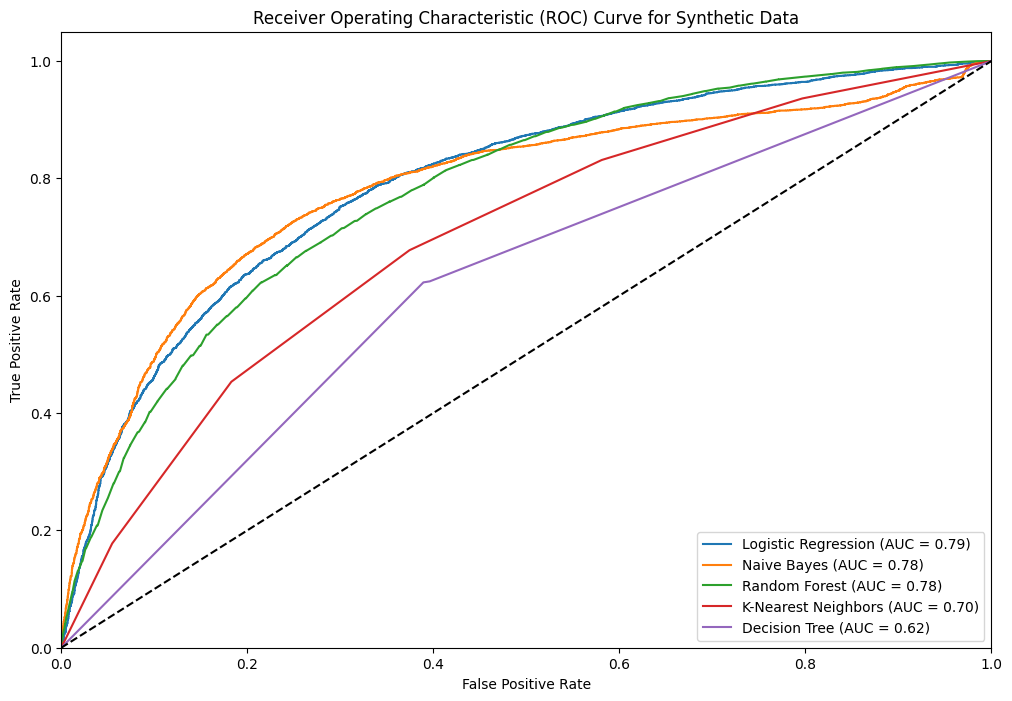

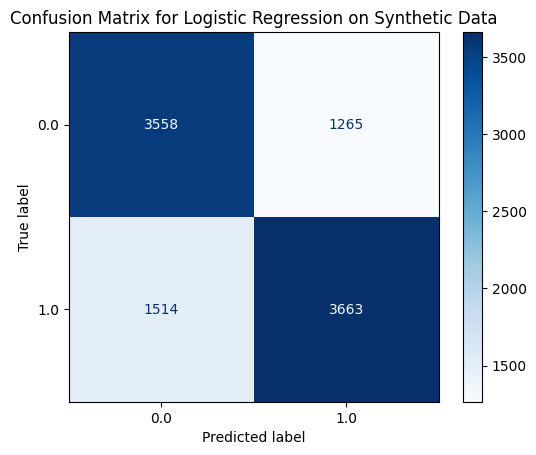

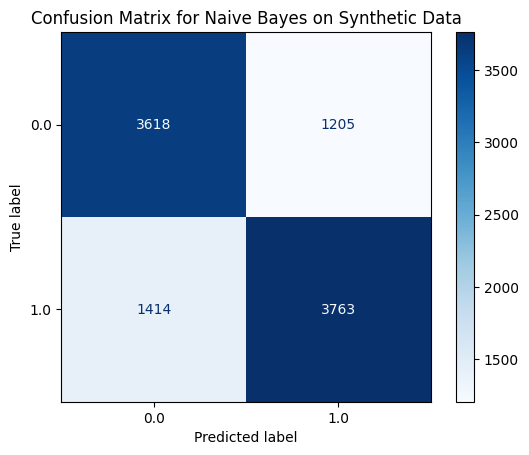

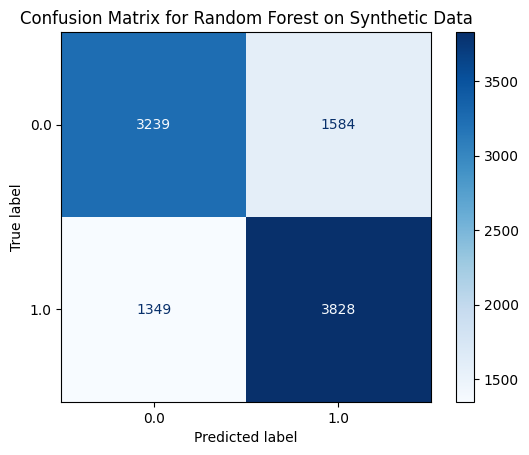

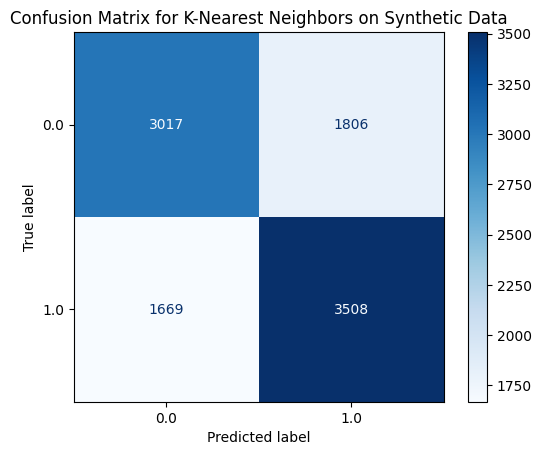

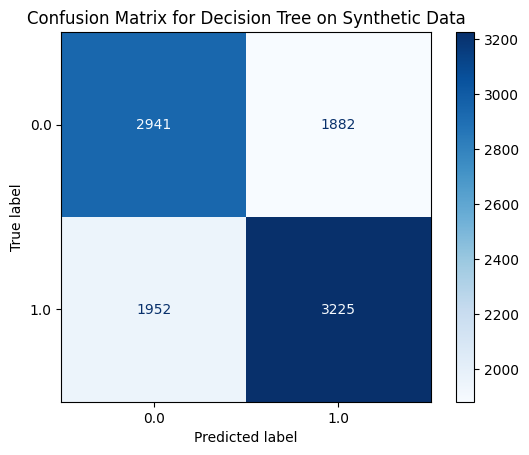

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

X_real = real_data.drop('Diabetes_binary', axis=1)
y_real = real_data['Diabetes_binary']

X_synthetic = synthetic_data.drop('Diabetes_binary', axis=1)
y_synthetic = synthetic_data['Diabetes_binary']

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]

for name, model in models:
    model.fit(X_train_real, y_train_real)
    y_pred_real = model.predict(X_test_real)
    accuracy_real = accuracy_score(y_test_real, y_pred_real)
    
    y_pred_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, y_pred_synthetic)
    
    print(f"{name}:")
    print(f"  Accuracy on real data: {accuracy_real}")
    print(f"  Accuracy on synthetic data: {accuracy_synthetic}")

plt.figure(figsize=(12, 8))

for name, model in models:
    y_proba_synthetic = model.predict_proba(X_synthetic)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_synthetic, y_proba_synthetic)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Synthetic Data')
plt.legend(loc="lower right")
plt.show()

for name, model in models:
    y_pred_synthetic = model.predict(X_synthetic)
    
    cm = confusion_matrix(y_synthetic, y_pred_synthetic)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name} on Synthetic Data')
    plt.show()

In [31]:
from sdv.single_table import CopulaGANSynthesizer
from sdv.metadata import SingleTableMetadata

real_data = balanced_df

# Create the metadata
metadata = SingleTableMetadata()
for column in columns:
    metadata.add_column(column, sdtype='numerical')

synthesizer = CopulaGANSynthesizer(metadata, epochs=10)
synthesizer.fit(real_data)

{
    "columns": {
        "Diabetes_binary": {
            "sdtype": "numerical"
        },
        "HighBP": {
            "sdtype": "numerical"
        },
        "HighChol": {
            "sdtype": "numerical"
        },
        "CholCheck": {
            "sdtype": "numerical"
        },
        "BMI": {
            "sdtype": "numerical"
        },
        "Smoker": {
            "sdtype": "numerical"
        },
        "Stroke": {
            "sdtype": "numerical"
        },
        "HeartDiseaseorAttack": {
            "sdtype": "numerical"
        },
        "PhysActivity": {
            "sdtype": "numerical"
        },
        "Fruits": {
            "sdtype": "numerical"
        },
        "Veggies": {
            "sdtype": "numerical"
        },
        "HvyAlcoholConsump": {
            "sdtype": "numerical"
        },
        "AnyHealthcare": {
            "sdtype": "numerical"
        },
        "NoDocbcCost": {
            "sdtype": "numerical"
        },
        "GenHlth

c:\Users\ensar\Desktop\Diabetes-Prediction\venv\lib\site-packages\sdv\single_table\base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [34]:
synthetic_data = synthesizer.sample(num_rows=1000)
synthetic_data.head(100)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,21.0,0.0,0.0,0.0,0,1,1,1,1,0.0,2.0,5.0,1.0,0.0,1,9,4.0,11.0
1,0.0,0,1.0,0,29.0,0.0,0.0,0.0,0,1,1,1,1,0.0,2.0,30.0,17.0,0.0,1,11,5.0,11.0
2,0.0,0,1.0,1,26.0,0.0,0.0,0.0,0,1,1,1,1,0.0,5.0,0.0,0.0,1.0,0,7,5.0,9.0
3,1.0,0,1.0,1,27.0,0.0,0.0,0.0,0,0,1,1,1,0.0,3.0,0.0,5.0,0.0,0,11,5.0,10.0
4,1.0,1,1.0,1,33.0,1.0,0.0,1.0,1,1,1,1,1,0.0,3.0,0.0,8.0,0.0,0,11,6.0,10.0
5,0.0,0,1.0,1,36.0,1.0,0.0,0.0,0,0,1,1,1,0.0,3.0,0.0,0.0,0.0,0,10,5.0,9.0
6,1.0,1,1.0,1,23.0,1.0,0.0,0.0,0,0,1,1,0,0.0,3.0,0.0,0.0,0.0,1,9,5.0,11.0
7,1.0,0,1.0,1,30.0,0.0,0.0,1.0,0,1,0,1,1,0.0,3.0,0.0,0.0,0.0,0,13,6.0,4.0
8,1.0,0,1.0,1,27.0,1.0,0.0,0.0,0,1,0,1,1,0.0,4.0,6.0,0.0,0.0,0,13,6.0,10.0
9,0.0,1,1.0,1,29.0,1.0,1.0,0.0,0,1,1,1,1,0.0,4.0,0.0,0.0,0.0,1,9,6.0,3.0


c:\Users\ensar\Desktop\Diabetes-Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  Accuracy on real data: 0.7354781054512958
  Accuracy on synthetic data: 0.416
Naive Bayes:
  Accuracy on real data: 0.7138814417634793
  Accuracy on synthetic data: 0.335
Random Forest:
  Accuracy on real data: 0.7272862675007448
  Accuracy on synthetic data: 0.484
K-Nearest Neighbors:
  Accuracy on real data: 0.6854334226988382
  Accuracy on synthetic data: 0.541
Decision Tree:
  Accuracy on real data: 0.6438784629133154
  Accuracy on synthetic data: 0.501


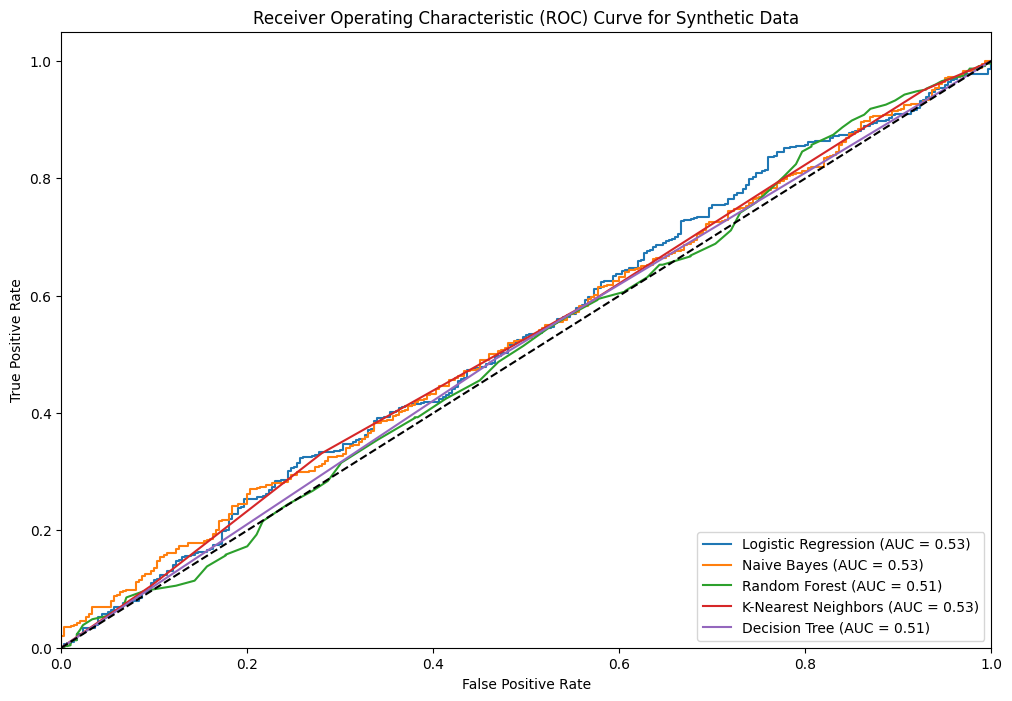

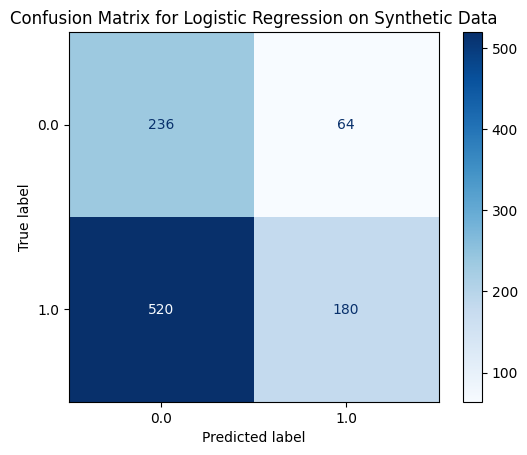

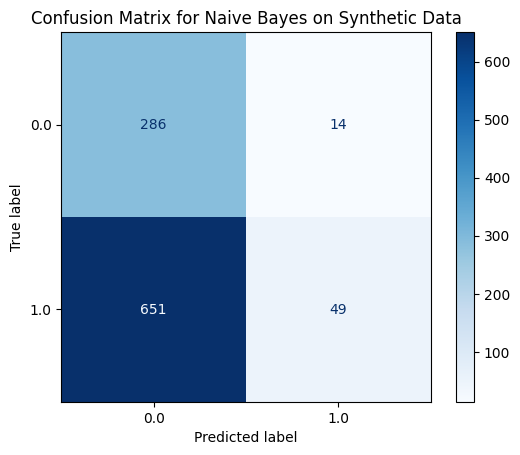

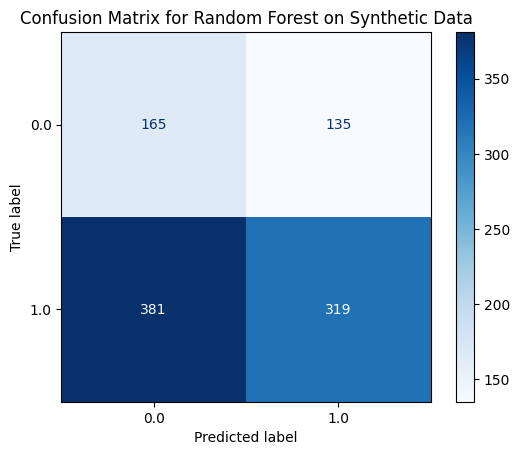

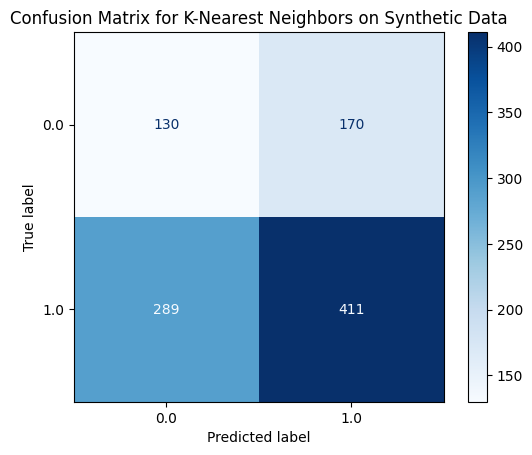

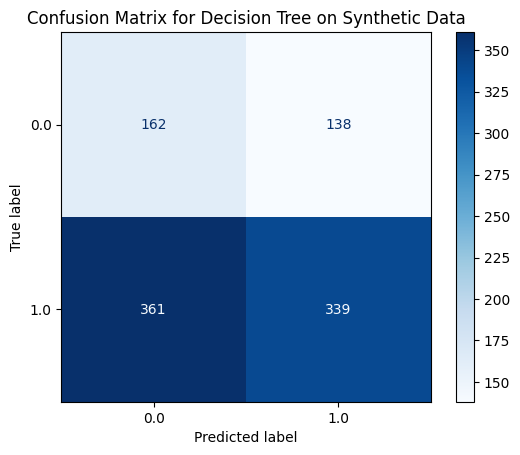

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

X_real = real_data.drop('Diabetes_binary', axis=1)
y_real = real_data['Diabetes_binary']

X_synthetic = synthetic_data.drop('Diabetes_binary', axis=1)
y_synthetic = synthetic_data['Diabetes_binary']

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]

for name, model in models:
    model.fit(X_train_real, y_train_real)
    y_pred_real = model.predict(X_test_real)
    accuracy_real = accuracy_score(y_test_real, y_pred_real)
    
    y_pred_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, y_pred_synthetic)
    
    print(f"{name}:")
    print(f"  Accuracy on real data: {accuracy_real}")
    print(f"  Accuracy on synthetic data: {accuracy_synthetic}")

plt.figure(figsize=(12, 8))

for name, model in models:
    y_proba_synthetic = model.predict_proba(X_synthetic)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_synthetic, y_proba_synthetic)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Synthetic Data')
plt.legend(loc="lower right")
plt.show()

for name, model in models:
    y_pred_synthetic = model.predict(X_synthetic)
    
    cm = confusion_matrix(y_synthetic, y_pred_synthetic)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name} on Synthetic Data')
    plt.show()